# Data Preparation

In [1]:
# To help you get started...
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import math
%matplotlib inline 

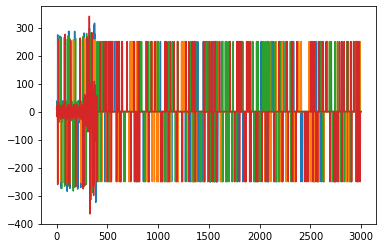

In [2]:
df = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Spring20\Tagup\exampleco_data-20200306T165930Z-001\exampleco_data\machine_0.csv',index_col=0)
plt.plot(range(len(df)), df)
plt.show()

Reframing Dataframe in understandable way

In [3]:
df['Date_created']=df.index

In [4]:
df=df.reset_index(drop=True)

In [5]:
df.rename(columns={'0':'sensor1',
                          '1':'sensor2',
                          '2':'sensor3','3':'sensor4'},inplace=True)

In [6]:
df.head()

,sensor1,sensor2,sensor3,sensor4,Date_created
0,12.626096,8.803120,-11.809200,10.083961,2019-01-01 00:00:00.000000000
1,10.831994,2.816327,11.554778,21.892853,2019-01-01 08:00:09.603201067
2,21.083510,-0.672645,-17.839178,-1.349024,2019-01-01 16:00:19.206402134
3,32.294495,6.525132,-13.498586,-4.250752,2019-01-02 00:00:28.809603201
4,28.057100,3.691359,21.984744,13.670561,2019-01-02 08:00:38.412804268


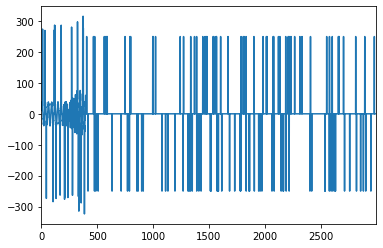

In [7]:
df['sensor1'].plot()

In [8]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [9]:
df.head()

,Date_created,sensor1,sensor2,sensor3,sensor4
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561


Creating new features dependent on Date_created

In [10]:
df.head()

,Date_created,sensor1,sensor2,sensor3,sensor4
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561


# Correlation between sensors

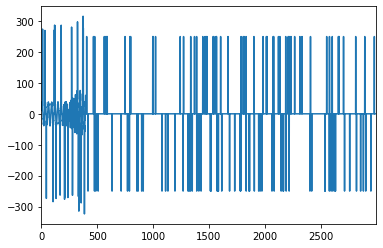

In [11]:
df['sensor1'].plot()

# keep only the ones that are within +3 to -3 standard deviations in the column 'Data' (Removing noise)

In [12]:
df=df[abs(df.sensor1-df.sensor1.mean()) <= (3*df.sensor1.std())]
df=df[abs(df.sensor2-df.sensor2.mean()) <= (3*df.sensor2.std())]
df=df[abs(df.sensor3-df.sensor3.mean()) <= (3*df.sensor3.std())]
df=df[abs(df.sensor4-df.sensor4.mean()) <= (3*df.sensor4.std())]

In [13]:
df=df.reset_index(drop=True)

In [14]:
df.head()

,Date_created,sensor1,sensor2,sensor3,sensor4
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561


# The below plot clearly tells us that machine is dead after 350 values

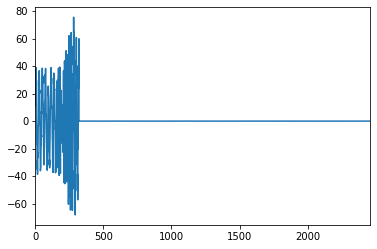

In [15]:
df['sensor1'].plot()

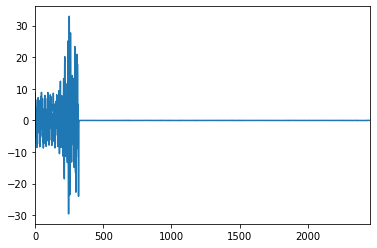

In [16]:
df['sensor2'].plot()

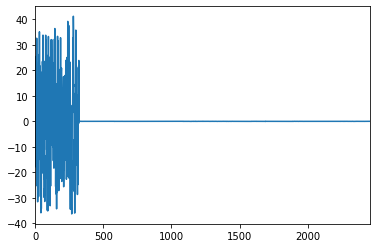

In [17]:
df['sensor3'].plot()

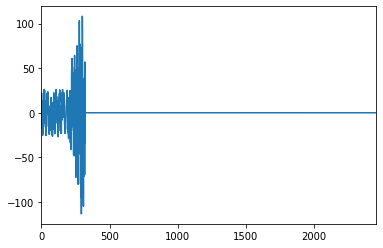

In [18]:
df['sensor4'].plot()

In [19]:
df.head()

,Date_created,sensor1,sensor2,sensor3,sensor4
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561


# Checking with mean_value how the data varies

In [22]:
df['mean_value']=df.apply(lambda row:(((row.sensor1)**2)+((row.sensor2)**2)+((row.sensor3)**2)+((row.sensor4)**2)/4),axis=1)

In [23]:
df['square_root']=df.apply(lambda row:math.sqrt(row.mean_value),axis=1)

In [24]:
df.head()

,Date_created,sensor1,sensor2,sensor3,sensor4,mean_value,square_root
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961,401.792003,20.044750
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853,378.600932,19.457670
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024,763.658087,27.634364
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752,1272.240768,35.668484
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561,1330.877002,36.481187


# Labelling of data is done by setting threshold value as 3 standard devaitions above mean

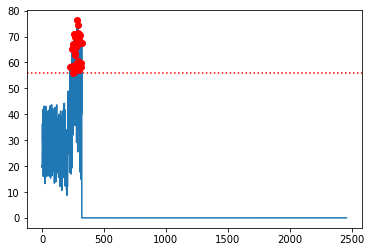

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


threshold = df['square_root'][:1500].mean()+3*df['square_root'][:1500].std()

ax.axhline(y=threshold, color='r', linestyle=':')
ax.plot(df['square_root'])

greater_than_threshold = [i for i, val in enumerate(df['square_root'][:1500]) if val>threshold]
ax.plot(greater_than_threshold, df['square_root'][:1500][greater_than_threshold], 
        linestyle='none', color='r', marker='o')

plt.show()

# Marking the labels

In [26]:
df['Labels']=df.apply(lambda row:0 if row.square_root>(threshold) else 1,axis=1)

In [27]:
df['Labels']

0       1
1       1
2       1
3       1
4       1
       ..
2453    1
2454    1
2455    1
2456    1
2457    1
Name: Labels, Length: 2458, dtype: int64

# Exploratory Data Analysis

When I have checked with all the different machine_Sensor values, I get to know that many of the machine sensors follow same pattern.
As I have observed there are normal values at initial stages and slowly it starts to rise. So, we can check the region for Faulty values.
As the different machine corresponding sensor values follow same pattern and each machine data consists of around 500 rows which is very less to apply any machine learning model.
So, I have plan to concatenate all the data
